# Reading and writing images

The Python Imaging Library supports a wide variety of image file formats. To read files from disk, use the ```open()``` function in the ```Image``` module. You don’t have to know the file format to open a file. The library automatically determines the format based on the contents of the file.

To save a file, use the ```save()``` method of the ```Image``` class. When saving files, the name becomes important. Unless you specify the format, the library uses the filename extension to discover which file storage format to use.




## Convert files to JPG

In [9]:
import os
from PIL import Image

# importing the image
im = Image.open("cl.png")
print("The size of the image before conversion : ", end = "")
print(os.path.getsize("cl.png"))

# converting to jpg
rgb_im = im.convert("RGB")

# exporting the image
rgb_im.save("cl_jpg.jpg")
print("The size of the image after conversion : ", end = "")
print(os.path.getsize("cl_jpg.jpg"))

The size of the image before conversion : 184693
The size of the image after conversion : 46714


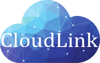

In [10]:
# creating a object
image = Image.open(r"/mnt/c/dev/fun_with/jupyter/notebooks/pillow/cl.png")
MAX_SIZE = (100, 100)

image.thumbnail(MAX_SIZE)

# creating thumbnail
image.save('pythonthumb.png')
image.show()

## Cutting, pasting and merging images

The Image class contains methods allowing you to manipulate regions within an image. To extract a sub-rectangle from an image, use the crop() method.

### Copying a subrectangle from an image

The region is defined by a 4-tuple, where coordinates are (left, upper, right, lower). The Python Imaging Library uses a coordinate system with (0, 0) in the upper left corner. Also note that coordinates refer to positions between the pixels, so the region in the above example is exactly 300x300 pixels.

In [17]:
box = (100, 100, 400, 400)
region = image.crop(box)

### Processing a subrectangle, and pasting it back

When pasting regions back, the size of the region must match the given region exactly. In addition, the region cannot extend outside the image. However, the modes of the original image and the region do not need to match. If they don’t, the region is automatically converted before being pasted (see the section on Color transforms below for details).

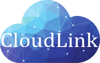

In [18]:
region = region.transpose(Image.ROTATE_180)
image.paste(region, box)
image.show()

### Rolling an image

In [19]:
def roll(image, delta):
    """Roll an image sideways."""
    xsize, ysize = image.size

    delta = delta % xsize
    if delta == 0:
        return image

    part1 = image.crop((0, 0, delta, ysize))
    part2 = image.crop((delta, 0, xsize, ysize))
    image.paste(part1, (xsize - delta, 0, xsize, ysize))
    image.paste(part2, (0, 0, xsize - delta, ysize))

    return image

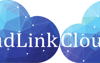

In [21]:
roll(image,20)

## Geometrical transforms

### Simple geometry transforms

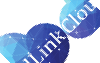

In [26]:
im = image
out = im.resize((128, 128))
out = im.rotate(45) # degrees counter-clockwise
out.show()

### Transposing an image

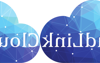

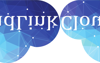

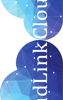

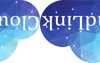

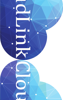

In [28]:
out = im.transpose(Image.FLIP_LEFT_RIGHT)
out.show()
out = im.transpose(Image.FLIP_TOP_BOTTOM)
out.show()
out = im.transpose(Image.ROTATE_90)
out.show()
out = im.transpose(Image.ROTATE_180)
out.show()
out = im.transpose(Image.ROTATE_270)
out.show()

## Color transforms

The Python Imaging Library allows you to convert images between different pixel representations using the convert() method.

### Converting between modes

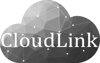

In [34]:
from PIL import Image

with Image.open("pythonthumb.png") as im:
    im = im.convert("L")
    im.show()

### Image enhancement

#### Filters

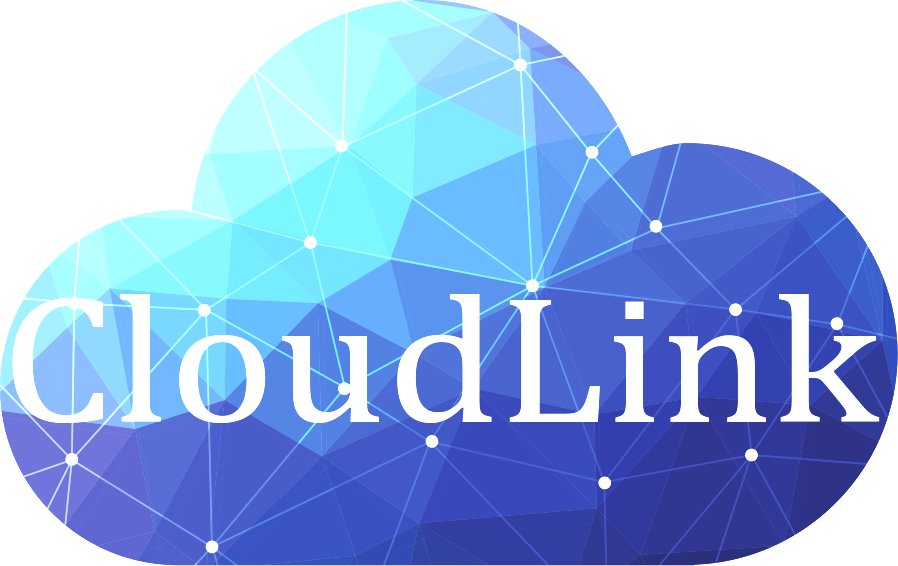

In [35]:
from PIL import ImageFilter
from PIL import Image

with Image.open("cl.png") as im:
    out = im.filter(ImageFilter.DETAIL)

    # multiply each pixel by 1.2
    out = im.point(lambda i: i * 1.2)

    out.show()

### Processing individual bands

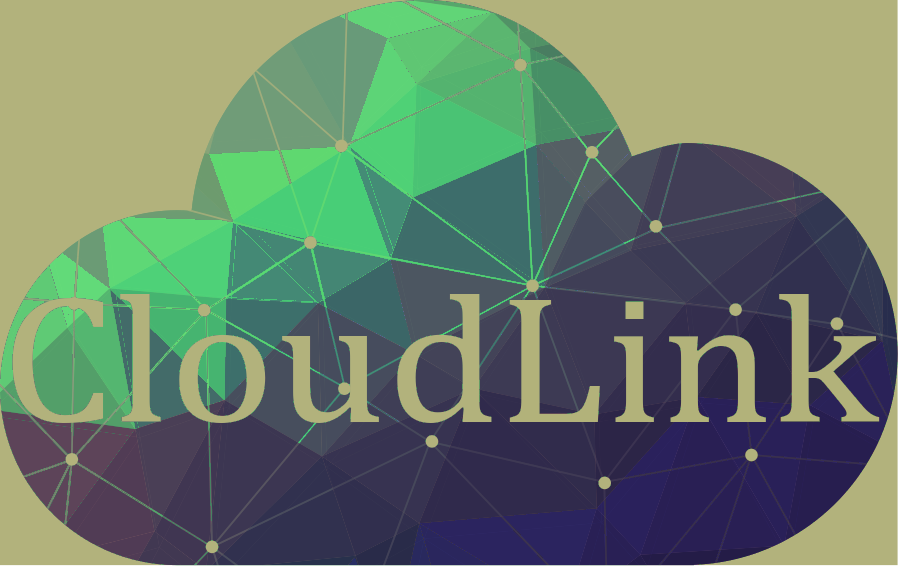

In [42]:
# split the image into individual bands
source = im.split()

R, G, B = 0, 1, 2

# select regions where red is more than 100
mask = source[R].point(lambda i: i > 100 and 255)

# process the green band
out = source[G].point(lambda i: i * 0.7)

# paste the processed band back, but only where red was < 100
source[G].paste(out, None, mask)

# build a new multiband image
im = Image.merge(im.mode, source)

im.show()

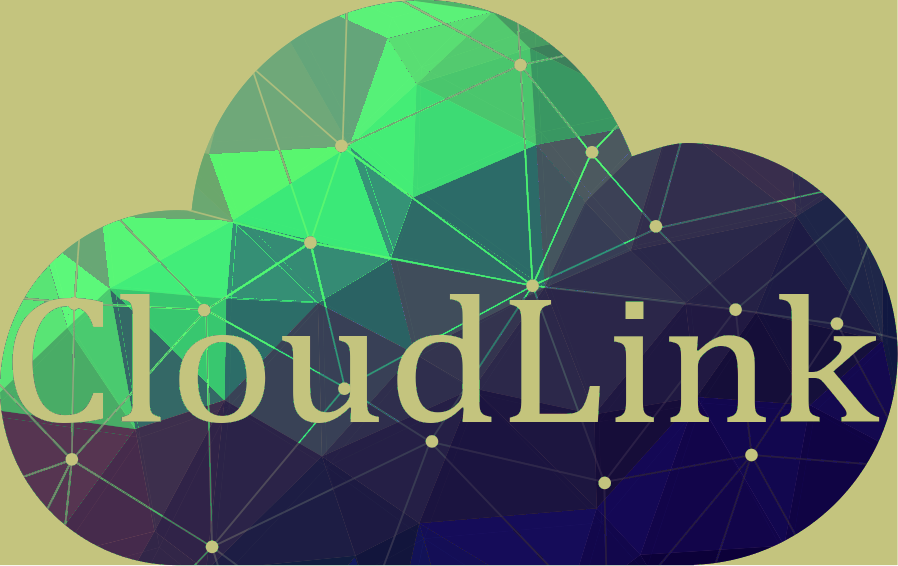

In [43]:
from PIL import ImageEnhance

enh = ImageEnhance.Contrast(im)
enh.enhance(1.3).show("30% more contrast")

#### Reading sequences

In [ ]:
from PIL import Image

with Image.open("fail.gif") as im:
    im.seek(25)  # skip to the 25 frame

    try:
        while 25:
            im.seek(im.tell() + 1)
            # do something to im
            out = im.resize((64, 64)) and im.rotate(45)
            out.show()
    except EOFError:
        pass  # end of sequence

In [ ]:
from PIL import ImageSequence, Image
with Image.open("fail.gif") as im:
    for frame in ImageSequence.Iterator(im):
        # ...do something to frame...
        im.rotate(+45)
        im.show()